# **INFO5731 Assignment: 4**

**This exercise will provide a valuable learning experience in working with text data and extracting features using various topic modeling algorithms. Key concepts such as Latent Dirichlet Allocation (LDA), Latent Semantic Analysis (LSA) and BERTopic.**



**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 100


NOTE: The output should be presented well to get **full points**

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


# **Question 1 (20 Points)**

**Dataset**: 20 Newsgroups dataset

**Dataset Link**: https://scikit-learn.org/0.19/datasets/twenty_newsgroups.html

**Consider Random 2000 rows only**

Generate K=10 topics by using LDA and LSA,
then calculate coherence score and determine the optimized K value by the coherence score. Further, summarize and visualize each topics in you own words.


In [ ]:
#1.
!pip install nltk
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


Coherence Score: 0.35398880203351224


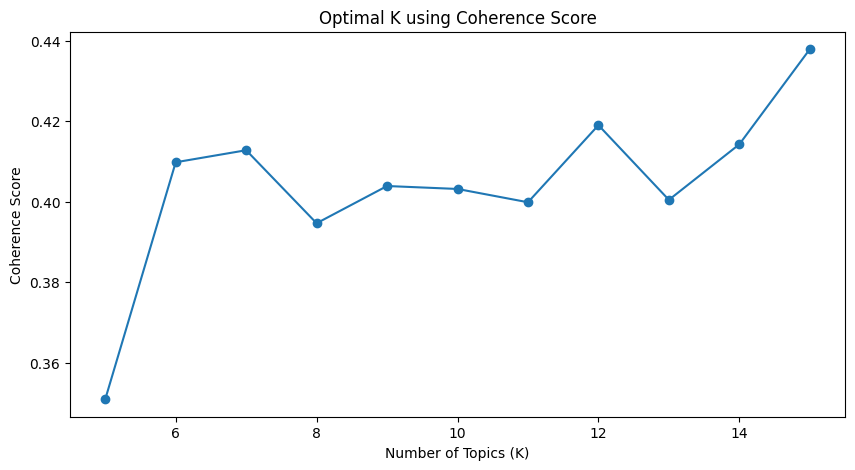

Optimal number of topics: 15


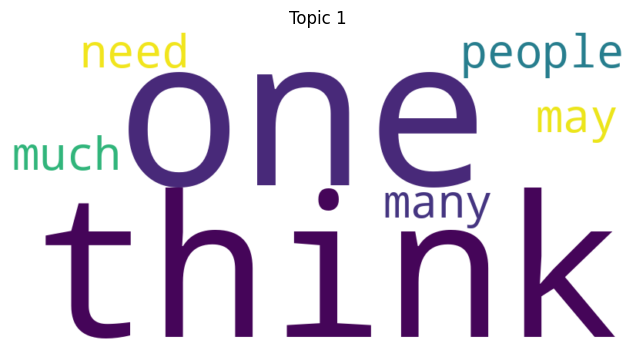

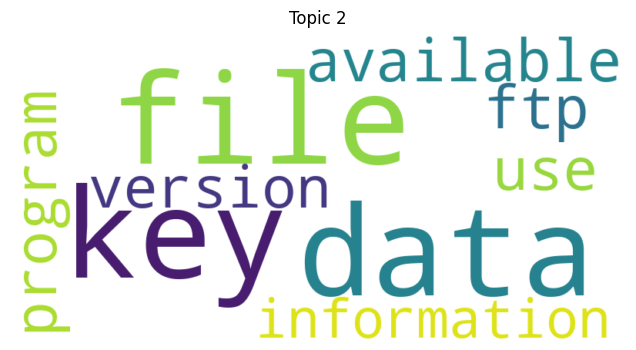

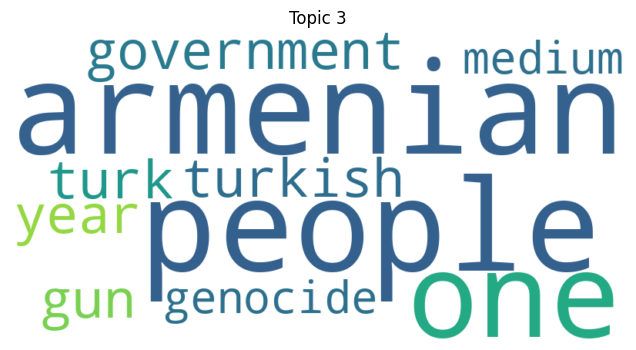

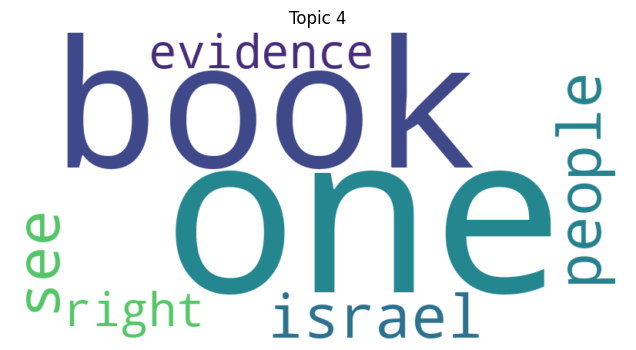

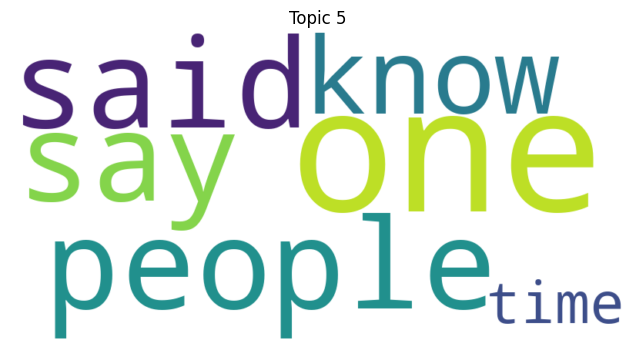

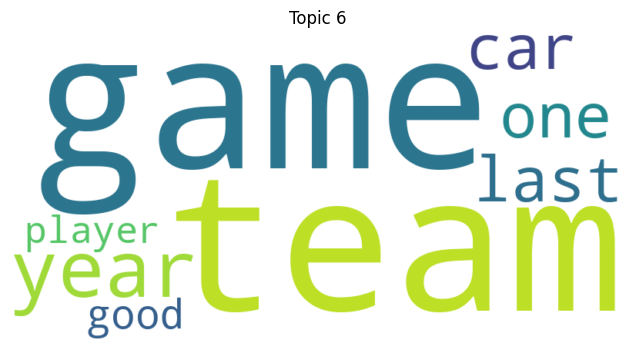

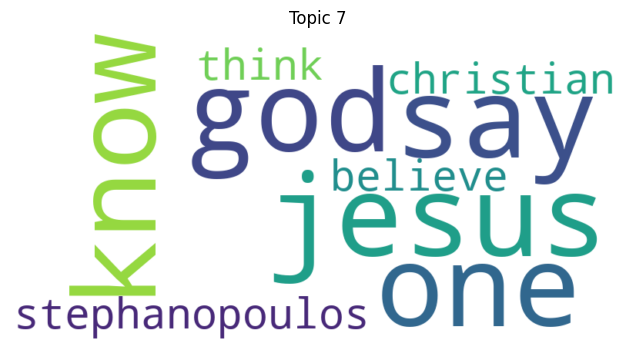

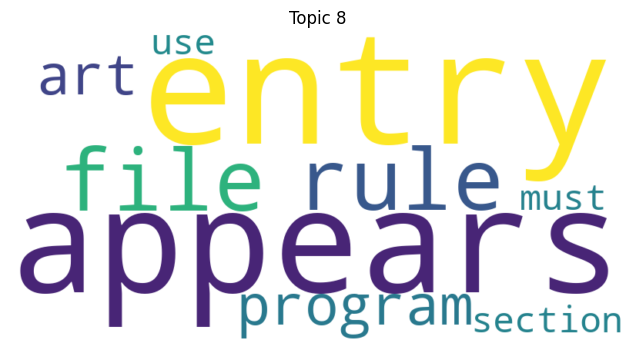

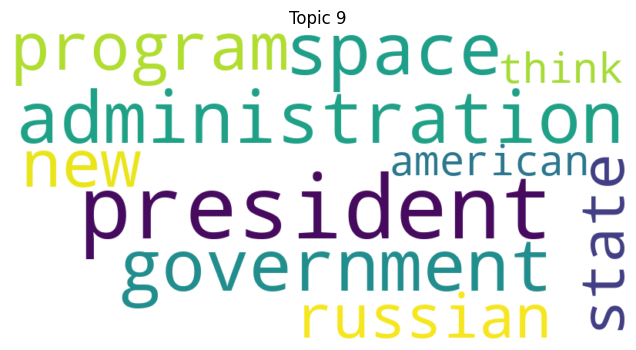

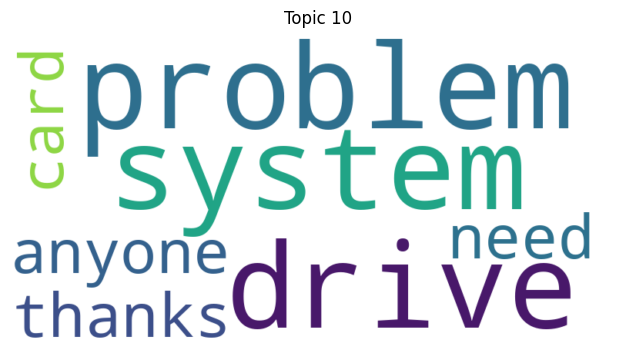

In [ ]:
import os
import numpy as np
import pandas as pd
import random
import re
import nltk
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import TruncatedSVD, LatentDirichletAllocation
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora import Dictionary
from gensim.models import LdaModel
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Ensure NLTK resources are correctly downloaded
nltk.download('punkt', force=True)
nltk.download('wordnet', force=True)
nltk.download('stopwords', force=True)
nltk.download('omw-1.4', force=True)

# Load dataset
categories = None
newsgroups = fetch_20newsgroups(subset='all', categories=categories, remove=('headers', 'footers', 'quotes'))

# Randomly sample 2000 rows
random.seed(42)
indices = random.sample(range(len(newsgroups.data)), 2000)
sampled_data = [newsgroups.data[i] for i in indices]

# Preprocess text
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = re.sub(r'\S*\d\S*', '', text)
    text = re.sub(r'\s+', ' ', text)
    tokens = word_tokenize(text.lower())
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word.isalpha() and word not in stop_words]
    return " ".join(tokens)

cleaned_texts = [preprocess_text(text) for text in sampled_data]

# Convert text to numerical form
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
tfidf_matrix = tfidf_vectorizer.fit_transform(cleaned_texts)

count_vectorizer = CountVectorizer(max_features=5000)
count_matrix = count_vectorizer.fit_transform(cleaned_texts)

# Train LSA model
num_topics = 10
lsa_model = TruncatedSVD(n_components=num_topics, random_state=42)
lsa_topics = lsa_model.fit_transform(tfidf_matrix)

# Train LDA model
lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda_topics = lda_model.fit_transform(count_matrix)

# Compute coherence score
tokenized_texts = [text.split() for text in cleaned_texts]
dictionary = Dictionary(tokenized_texts)
corpus = [dictionary.doc2bow(text) for text in tokenized_texts]

lda_gensim = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, passes=10)
coherence_model = CoherenceModel(model=lda_gensim, texts=tokenized_texts, dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model.get_coherence()
print(f"Coherence Score: {coherence_score}")

# Finding optimal K
coherence_scores = []
topic_values = list(range(5, 16, 1))

for k in topic_values:
    lda_temp = LdaModel(corpus=corpus, id2word=dictionary, num_topics=k, passes=10)
    coherence_model = CoherenceModel(model=lda_temp, texts=tokenized_texts, dictionary=dictionary, coherence='c_v')
    coherence_scores.append(coherence_model.get_coherence())

# Plot coherence scores
plt.figure(figsize=(10,5))
plt.plot(topic_values, coherence_scores, marker='o')
plt.xlabel("Number of Topics (K)")
plt.ylabel("Coherence Score")
plt.title("Optimal K using Coherence Score")
plt.show()

optimal_k = topic_values[np.argmax(coherence_scores)]
print(f"Optimal number of topics: {optimal_k}")

# Extract and visualize topics
def get_top_words(model, vectorizer, n_words=10):
    words = vectorizer.get_feature_names_out()
    topics = []
    for topic_weights in model.components_:
        top_words = [words[i] for i in topic_weights.argsort()[:-n_words - 1:-1]]
        topics.append(" ".join(top_words))
    return topics

lda_topics_words = get_top_words(lda_model, count_vectorizer)
lsa_topics_words = get_top_words(lsa_model, tfidf_vectorizer)

for i, topic in enumerate(lda_topics_words):
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(topic)
    plt.figure(figsize=(8, 4))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Topic {i+1}")
    plt.show()


# **BERTopic**

The following question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents.

Dataset from **assignment-3** (text dataset) .

> Dont use any custom datasets.


> Dataset must have 1000+ rows, no duplicates and null values



# **Question 2 (20 Points)**



Q2) **Generate K=10 topics by using BERTopic and then find optimal K value by the coherence score. Interpret each topic and visualize with suitable style.**

In [ ]:
#2.

In [ ]:
!pip install --upgrade numpy==1.26.0
!pip install --upgrade jax jaxlib
!pip install bertopic

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 45.4 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.4
    Uninstalling numpy-1.24.4:
      Successfully uninstalled numpy-1.24.4
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 35.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.1/105.1 MB 47.5 MB/s eta 0:00:00
  Attempting uninstall: jaxlib
    Found existing installation: jaxlib 0.5.1
    Uninstalling jaxlib-0.5.1:
      Successfully uninstalled jaxlib-0.5.1
  Attempting uninstall: jax
    Found existing installation: jax 0.5.2
    Uninstalling jax-0.5.2:
      Successfully uninstalled jax-0.5.2


In [ ]:
import numpy as np
print(np.__version__)


1.26.0


In [ ]:
!pip install --upgrade scipy

In [ ]:
!pip install --upgrade scipy==1.10.0
!pip install --upgrade gensim
!pip install --upgrade bertopic

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.1/34.1 MB 69.1 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.2
    Uninstalling scipy-1.15.2:
      Successfully uninstalled scipy-1.15.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jaxlib 0.5.3 requires scipy>=1.11.1, but you have scipy 1.10.0 which is incompatible.
jax 0.5.3 requires scipy>=1.11.1, but you have scipy 1.10.0 which is incompatible.
scikit-image 0.25.2 requires scipy>=1.11.4, but you have scipy 1.10.0 which is incompatible.
cvxpy 1.6.4 requires scipy>=1.11.0, but you have scipy 1.10.0 which is incompatible.
imbalanced-learn 0.13.0 requires scipy<2,>=1.10.1, but you have scipy 1.10.0 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 79.8 MB/s eta 0:00:00
  Attempting uninstall: gensim
    Found existing installation: gensi

In [ ]:
import pandas as pd
from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer
from gensim.corpora import Dictionary
from gensim.models.coherencemodel import CoherenceModel

# Load and clean the dataset
df = pd.read_csv('research_papers_cleaned (5).csv')
df = df.dropna(subset=['Abstract'])  # Replace with actual column name
df = df.drop_duplicates(subset=['Abstract'])

# Prepare documents list
docs = df['Abstract'].tolist()

# Function to calculate coherence scores for a range of topic numbers
def calculate_coherence_score(topic_model, docs, start_k=5, end_k=15): # Increased range for k
    coherence_scores = []
    for k in range(start_k, end_k + 1):
        # Create a new BERTopic model with the current number of topics (k)
        temp_topic_model = BERTopic(nr_topics=k, verbose=True) # Added verbose for progress
        temp_topics, _ = temp_topic_model.fit_transform(docs)

        # Get the topics for coherence calculation, handling potential empty topics
        topics_tokens = [
            [word for word, _ in temp_topic_model.get_topic(topic_id)]
            for topic_id in set(temp_topics) if topic_id != -1 and temp_topic_model.get_topic(topic_id) is not None  # Updated condition for non-empty and valid topics
        ]

        # If no valid topics are found, skip coherence calculation for this k
        if not topics_tokens:
            continue

        # Create a dictionary and corpus for coherence calculation
        dictionary = Dictionary(temp_topic_model.vectorizer_model.build_analyzer()(doc) for doc in docs)
        corpus = [dictionary.doc2bow(temp_topic_model.vectorizer_model.build_analyzer()(doc)) for doc in docs]

        # Calculate coherence for the current k
        cm = CoherenceModel(
            topics=topics_tokens,
            texts=[temp_topic_model.vectorizer_model.build_analyzer()(doc) for doc in docs],
            corpus=corpus,
            dictionary=dictionary,
            coherence='u_mass'
        )
        coherence = cm.get_coherence()
        coherence_scores.append((k, coherence))

    return coherence_scores

# Calculate coherence scores
coherence_scores = calculate_coherence_score(BERTopic(), docs)  # Pass a new BERTopic instance

# Find the optimal K
if coherence_scores:  # Check if coherence scores were calculated
    optimal_k = max(coherence_scores, key=lambda item: item[1])[0]
    print(f"Optimal number of topics (K): {optimal_k}")

    # Re-train the BERTopic model with the optimal K
    topic_model = BERTopic(nr_topics=optimal_k, verbose=True)
    topics, probabilities = topic_model.fit_transform(docs)

    # Interpret and print the top words for each topic
    for topic in set(topics):
        if topic != -1:  # Skip the outlier topic (-1)
            print(f"Topic {topic}: {topic_model.get_topic(topic)}")

    # Visualize topics
    topic_model.visualize_topics()
    # Check if there are enough topics for hierarchy visualization
    if optimal_k > 2:
        topic_model.visualize_hierarchy()
    else:
        print("Not enough topics to visualize hierarchy (optimal_k <= 2)")
    topic_model.visualize_barchart()
else:
    print("No valid topics found for coherence calculation.")

2025-04-06 05:37:27,392 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/90 [00:00<?, ?it/s]

2025-04-06 05:42:17,348 - BERTopic - Embedding - Completed ✓
2025-04-06 05:42:17,350 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-04-06 05:42:31,714 - BERTopic - Dimensionality - Completed ✓
2025-04-06 05:42:31,715 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-04-06 05:42:31,818 - BERTopic - Cluster - Completed ✓
2025-04-06 05:42:31,819 - BERTopic - Representation - Extracting topics using c-TF-IDF for topic reduction.
2025-04-06 05:42:32,361 - BERTopic - Representation - Completed ✓
2025-04-06 05:42:32,363 - BERTopic - Topic reduction - Reducing number of topics
2025-04-06 05:42:32,381 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-04-06 05:42:32,910 - BERTopic - Representation - Completed ✓
2025-04-06 05:42:32,913 - BERTopic - Topic reduction - Reduced number of topics from 75 to 5
2025-04-06 05:42:34,389 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/90 [00:00<?, ?it/s]

2025-04-06 05:47:18,580 - BERTopic - Embedding - Completed ✓
2025-04-06 05:47:18,582 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-04-06 05:47:32,373 - BERTopic - Dimensionality - Completed ✓
2025-04-06 05:47:32,375 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-04-06 05:47:32,464 - BERTopic - Cluster - Completed ✓
2025-04-06 05:47:32,465 - BERTopic - Representation - Extracting topics using c-TF-IDF for topic reduction.
2025-04-06 05:47:33,015 - BERTopic - Representation - Completed ✓
2025-04-06 05:47:33,017 - BERTopic - Topic reduction - Reducing number of topics
2025-04-06 05:47:33,041 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-04-06 05:47:33,544 - BERTopic - Representation - Completed ✓
2025-04-06 05:47:33,547 - BERTopic - Topic reduction - Reduced number of topics from 72 to 6
2025-04-06 05:47:35,076 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/90 [00:00<?, ?it/s]

2025-04-06 05:52:18,864 - BERTopic - Embedding - Completed ✓
2025-04-06 05:52:18,865 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-04-06 05:52:34,855 - BERTopic - Dimensionality - Completed ✓
2025-04-06 05:52:34,857 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-04-06 05:52:34,961 - BERTopic - Cluster - Completed ✓
2025-04-06 05:52:34,962 - BERTopic - Representation - Extracting topics using c-TF-IDF for topic reduction.
2025-04-06 05:52:35,532 - BERTopic - Representation - Completed ✓
2025-04-06 05:52:35,534 - BERTopic - Topic reduction - Reducing number of topics
2025-04-06 05:52:35,552 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-04-06 05:52:36,124 - BERTopic - Representation - Completed ✓
2025-04-06 05:52:36,128 - BERTopic - Topic reduction - Reduced number of topics from 74 to 7
2025-04-06 05:52:37,728 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/90 [00:00<?, ?it/s]

2025-04-06 05:57:30,432 - BERTopic - Embedding - Completed ✓
2025-04-06 05:57:30,434 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-04-06 05:57:44,510 - BERTopic - Dimensionality - Completed ✓
2025-04-06 05:57:44,513 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-04-06 05:57:44,615 - BERTopic - Cluster - Completed ✓
2025-04-06 05:57:44,616 - BERTopic - Representation - Extracting topics using c-TF-IDF for topic reduction.
2025-04-06 05:57:45,140 - BERTopic - Representation - Completed ✓
2025-04-06 05:57:45,142 - BERTopic - Topic reduction - Reducing number of topics
2025-04-06 05:57:45,159 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-04-06 05:57:45,666 - BERTopic - Representation - Completed ✓
2025-04-06 05:57:45,669 - BERTopic - Topic reduction - Reduced number of topics from 75 to 8
2025-04-06 05:57:47,229 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/90 [00:00<?, ?it/s]

2025-04-06 06:02:36,404 - BERTopic - Embedding - Completed ✓
2025-04-06 06:02:36,405 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-04-06 06:02:51,099 - BERTopic - Dimensionality - Completed ✓
2025-04-06 06:02:51,101 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-04-06 06:02:51,200 - BERTopic - Cluster - Completed ✓
2025-04-06 06:02:51,201 - BERTopic - Representation - Extracting topics using c-TF-IDF for topic reduction.
2025-04-06 06:02:51,762 - BERTopic - Representation - Completed ✓
2025-04-06 06:02:51,764 - BERTopic - Topic reduction - Reducing number of topics
2025-04-06 06:02:51,781 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-04-06 06:02:52,327 - BERTopic - Representation - Completed ✓
2025-04-06 06:02:52,330 - BERTopic - Topic reduction - Reduced number of topics from 75 to 9
2025-04-06 06:02:53,952 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/90 [00:00<?, ?it/s]

2025-04-06 06:07:55,692 - BERTopic - Embedding - Completed ✓
2025-04-06 06:07:55,693 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-04-06 06:08:10,491 - BERTopic - Dimensionality - Completed ✓
2025-04-06 06:08:10,493 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-04-06 06:08:10,601 - BERTopic - Cluster - Completed ✓
2025-04-06 06:08:10,602 - BERTopic - Representation - Extracting topics using c-TF-IDF for topic reduction.
2025-04-06 06:08:11,177 - BERTopic - Representation - Completed ✓
2025-04-06 06:08:11,178 - BERTopic - Topic reduction - Reducing number of topics
2025-04-06 06:08:11,199 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-04-06 06:08:11,794 - BERTopic - Representation - Completed ✓
2025-04-06 06:08:11,800 - BERTopic - Topic reduction - Reduced number of topics from 76 to 10
2025-04-06 06:08:13,520 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/90 [00:00<?, ?it/s]

2025-04-06 06:13:11,032 - BERTopic - Embedding - Completed ✓
2025-04-06 06:13:11,033 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-04-06 06:13:25,461 - BERTopic - Dimensionality - Completed ✓
2025-04-06 06:13:25,462 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-04-06 06:13:25,564 - BERTopic - Cluster - Completed ✓
2025-04-06 06:13:25,565 - BERTopic - Representation - Extracting topics using c-TF-IDF for topic reduction.
2025-04-06 06:13:26,141 - BERTopic - Representation - Completed ✓
2025-04-06 06:13:26,142 - BERTopic - Topic reduction - Reducing number of topics
2025-04-06 06:13:26,161 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-04-06 06:13:26,733 - BERTopic - Representation - Completed ✓
2025-04-06 06:13:26,737 - BERTopic - Topic reduction - Reduced number of topics from 77 to 11
2025-04-06 06:13:28,353 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/90 [00:00<?, ?it/s]

2025-04-06 06:18:26,409 - BERTopic - Embedding - Completed ✓
2025-04-06 06:18:26,411 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-04-06 06:18:41,278 - BERTopic - Dimensionality - Completed ✓
2025-04-06 06:18:41,279 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-04-06 06:18:41,376 - BERTopic - Cluster - Completed ✓
2025-04-06 06:18:41,377 - BERTopic - Representation - Extracting topics using c-TF-IDF for topic reduction.
2025-04-06 06:18:41,944 - BERTopic - Representation - Completed ✓
2025-04-06 06:18:41,946 - BERTopic - Topic reduction - Reducing number of topics
2025-04-06 06:18:41,966 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-04-06 06:18:42,513 - BERTopic - Representation - Completed ✓
2025-04-06 06:18:42,518 - BERTopic - Topic reduction - Reduced number of topics from 72 to 12
2025-04-06 06:18:44,146 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/90 [00:00<?, ?it/s]

2025-04-06 06:23:44,548 - BERTopic - Embedding - Completed ✓
2025-04-06 06:23:44,550 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-04-06 06:23:59,829 - BERTopic - Dimensionality - Completed ✓
2025-04-06 06:23:59,831 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-04-06 06:24:00,020 - BERTopic - Cluster - Completed ✓
2025-04-06 06:24:00,024 - BERTopic - Representation - Extracting topics using c-TF-IDF for topic reduction.
2025-04-06 06:24:00,989 - BERTopic - Representation - Completed ✓
2025-04-06 06:24:00,992 - BERTopic - Topic reduction - Reducing number of topics
2025-04-06 06:24:01,012 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-04-06 06:24:01,824 - BERTopic - Representation - Completed ✓
2025-04-06 06:24:01,828 - BERTopic - Topic reduction - Reduced number of topics from 77 to 13
2025-04-06 06:24:03,525 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/90 [00:00<?, ?it/s]

2025-04-06 06:29:04,870 - BERTopic - Embedding - Completed ✓
2025-04-06 06:29:04,871 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-04-06 06:29:19,354 - BERTopic - Dimensionality - Completed ✓
2025-04-06 06:29:19,355 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-04-06 06:29:19,453 - BERTopic - Cluster - Completed ✓
2025-04-06 06:29:19,454 - BERTopic - Representation - Extracting topics using c-TF-IDF for topic reduction.
2025-04-06 06:29:20,007 - BERTopic - Representation - Completed ✓
2025-04-06 06:29:20,008 - BERTopic - Topic reduction - Reducing number of topics
2025-04-06 06:29:20,030 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-04-06 06:29:20,584 - BERTopic - Representation - Completed ✓
2025-04-06 06:29:20,587 - BERTopic - Topic reduction - Reduced number of topics from 78 to 14
2025-04-06 06:29:22,249 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/90 [00:00<?, ?it/s]

2025-04-06 06:34:19,953 - BERTopic - Embedding - Completed ✓
2025-04-06 06:34:19,954 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-04-06 06:34:34,679 - BERTopic - Dimensionality - Completed ✓
2025-04-06 06:34:34,680 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-04-06 06:34:34,774 - BERTopic - Cluster - Completed ✓
2025-04-06 06:34:34,775 - BERTopic - Representation - Extracting topics using c-TF-IDF for topic reduction.
2025-04-06 06:34:35,349 - BERTopic - Representation - Completed ✓
2025-04-06 06:34:35,351 - BERTopic - Topic reduction - Reducing number of topics
2025-04-06 06:34:35,372 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-04-06 06:34:35,906 - BERTopic - Representation - Completed ✓
2025-04-06 06:34:35,909 - BERTopic - Topic reduction - Reduced number of topics from 77 to 15
2025-04-06 06:34:37,551 - BERTopic - Embedding - Transforming documents to embeddings.


Optimal number of topics (K): 6


Batches:   0%|          | 0/90 [00:00<?, ?it/s]

2025-04-06 06:39:30,466 - BERTopic - Embedding - Completed ✓
2025-04-06 06:39:30,467 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-04-06 06:39:45,138 - BERTopic - Dimensionality - Completed ✓
2025-04-06 06:39:45,140 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-04-06 06:39:45,239 - BERTopic - Cluster - Completed ✓
2025-04-06 06:39:45,241 - BERTopic - Representation - Extracting topics using c-TF-IDF for topic reduction.
2025-04-06 06:39:45,767 - BERTopic - Representation - Completed ✓
2025-04-06 06:39:45,768 - BERTopic - Topic reduction - Reducing number of topics
2025-04-06 06:39:45,789 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-04-06 06:39:46,312 - BERTopic - Representation - Completed ✓
2025-04-06 06:39:46,315 - BERTopic - Topic reduction - Reduced number of topics from 74 to 6


Topic 0: [('the', 0.07382985951990925), ('of', 0.06810426206320151), ('and', 0.06634379147808164), ('to', 0.05130096538932386), ('in', 0.05099764989541679), ('learning', 0.042717047727726366), ('for', 0.033087151066909855), ('is', 0.032126159970868574), ('machine', 0.02934066870147668), ('that', 0.028622106965735306)]
Topic 1: [('the', 0.07647325327128247), ('of', 0.0613003760575306), ('and', 0.05364225302347465), ('extraction', 0.05363954495037024), ('information', 0.052973703059007976), ('to', 0.04871607554120507), ('in', 0.04295746454855189), ('for', 0.039044942393086826), ('is', 0.03629498405932716), ('we', 0.03501349617197745)]
Topic 2: [('data', 0.07921257868972281), ('the', 0.07791942818803518), ('of', 0.07145027710406354), ('and', 0.07127572634361047), ('science', 0.06537164968634532), ('to', 0.05642394689459707), ('in', 0.04977068566345797), ('for', 0.031692491255266235), ('that', 0.031048322339558527), ('research', 0.030050055943456458)]
Topic 3: [('the', 0.09791798964094107)

In [3]:
# Step 1: Import + Load your data
import pandas as pd
from bertopic import BERTopic

df = pd.read_csv("research_papers_cleaned (5).csv")
df = df.dropna(subset=['Abstract']).drop_duplicates(subset=['Abstract'])
docs = df['Abstract'].tolist()

# Step 2: Fit BERTopic
topic_model = BERTopic(nr_topics=10, verbose=True)  # or use optimal_k
topics, _ = topic_model.fit_transform(docs)

# Step 3: Visualize
fig = topic_model.visualize_topics()
fig.show()

2025-04-08 00:25:34,733 - BERTopic - Embedding - Transforming documents to embeddings.


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/90 [00:00<?, ?it/s]

2025-04-08 00:30:53,126 - BERTopic - Embedding - Completed ✓
2025-04-08 00:30:53,128 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-04-08 00:31:16,966 - BERTopic - Dimensionality - Completed ✓
2025-04-08 00:31:16,967 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-04-08 00:31:17,074 - BERTopic - Cluster - Completed ✓
2025-04-08 00:31:17,075 - BERTopic - Representation - Extracting topics using c-TF-IDF for topic reduction.
2025-04-08 00:31:17,613 - BERTopic - Representation - Completed ✓
2025-04-08 00:31:17,615 - BERTopic - Topic reduction - Reducing number of topics
2025-04-08 00:31:17,632 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-04-08 00:31:18,150 - BERTopic - Representation - Completed ✓
2025-04-08 00:31:18,154 - BERTopic - Topic reduction - Reduced number of topics from 74 to 10


In [4]:
import plotly.io as pio # Import the plotly.io module and alias it as 'pio'
pio.renderers.default = 'colab'

In [5]:
fig = topic_model.visualize_barchart()
fig.show()

fig = topic_model.visualize_hierarchy()
fig.show()

# **Question 3 (25 points)**


**Dataset Link**: 20 Newsgroup Dataset (Random 2000 values)

Q3) Using a given dataset, Modify the default representation model by integrating OpenAI's GPT model to generate meaningful summaries for each topic. Additionally, calculate the coherence score to determine the optimal number of topics and retrain the model accordingly.



Usefull Link: https://maartengr.github.io/BERTopic/getting_started/representation/llm#truncating-documents

In [ ]:
#3.

In [ ]:
!pip install nltk
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
from sklearn.datasets import fetch_20newsgroups
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk
import re

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Load dataset
newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))
docs = newsgroups.data[:2000]

# Preprocessing function
def preprocess(text):
    text = re.sub(r'\W+', ' ', text.lower())  # Lowercase + remove special characters
    tokens = word_tokenize(text)
    tokens = [t for t in tokens if t not in stopwords.words('english')]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(t) for t in tokens]
    return tokens

processed_docs = [preprocess(doc) for doc in docs]


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
from gensim import corpora

dictionary = corpora.Dictionary(processed_docs)
corpus = [dictionary.doc2bow(doc) for doc in processed_docs]


In [ ]:
from gensim.models import LdaModel, CoherenceModel

def train_evaluate_lda(corpus, dictionary, texts, start=5, limit=20, step=1):
    models = []
    coherences = []

    for num_topics in range(start, limit + 1, step):
        model = LdaModel(corpus=corpus,
                         id2word=dictionary,
                         num_topics=num_topics,
                         random_state=42,
                         passes=10)
        coherence_model = CoherenceModel(model=model,
                                         texts=texts,
                                         dictionary=dictionary,
                                         coherence='c_v')
        coherence_score = coherence_model.get_coherence()
        models.append(model)
        coherences.append(coherence_score)
        print(f"Topics: {num_topics}, Coherence Score: {coherence_score:.4f}")

    return models, coherences

models, scores = train_evaluate_lda(corpus, dictionary, processed_docs, start=5, limit=20)


Topics: 5, Coherence Score: 0.5038
Topics: 6, Coherence Score: 0.4753
Topics: 7, Coherence Score: 0.4669
Topics: 8, Coherence Score: 0.4697
Topics: 9, Coherence Score: 0.5350
Topics: 10, Coherence Score: 0.5124
Topics: 11, Coherence Score: 0.5229
Topics: 12, Coherence Score: 0.5019
Topics: 13, Coherence Score: 0.5020
Topics: 14, Coherence Score: 0.5271
Topics: 15, Coherence Score: 0.4974
Topics: 16, Coherence Score: 0.4993
Topics: 17, Coherence Score: 0.5278
Topics: 18, Coherence Score: 0.4613
Topics: 19, Coherence Score: 0.4955
Topics: 20, Coherence Score: 0.4445


In [ ]:
import numpy as np

best_index = np.argmax(scores)
best_model = models[best_index]
optimal_topics = best_model.num_topics
print(f"\nBest model has {optimal_topics} topics with coherence score of {scores[best_index]:.4f}")



Best model has 9 topics with coherence score of 0.5350


In [ ]:
!pip install python-dotenv


In [ ]:
from dotenv import load_dotenv
load_dotenv()
import os

client = OpenAI(api_key=os.getenv("OPENAI_API_KEY"))


In [ ]:
# Simulate the .env file inside Colab (not visible but works)
with open(".env", "w") as f:
    f.write("OPENAI_API_KEY=sk-xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx")


In [ ]:
# Necessary imports
import os
import openai
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from dotenv import load_dotenv

# Load environment variables (if using .env file)
load_dotenv()

# Securely set OpenAI API key
openai.api_key = os.getenv("OPENAI_API_KEY")

# Function to summarize the topic using OpenAI GPT
def summarize_topic(topic_words):
    prompt = f"Summarize this topic based on the following keywords:\n{', '.join(topic_words)}"
    print(f"\n[Prompt Sent to GPT]:\n{prompt}")

    try:
        response = openai.ChatCompletion.create(
            model="gpt-3.5-turbo",
            messages=[{"role": "user", "content": prompt}],
            max_tokens=60
        )
        return response.choices[0].message.content.strip()
    except Exception as e:
        return f"Error generating summary: {e}"

# Step 1: Load the 20 Newsgroups dataset
newsgroups_data = fetch_20newsgroups(subset='train')

# Step 2: Vectorize text using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=2000)
X = vectorizer.fit_transform(newsgroups_data.data)

# Step 3: Apply LDA for topic modeling
n_topics = 10  # Number of topics
lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
lda.fit(X)

# Step 4: Generate summaries for each topic using GPT
for i in range(n_topics):
    topic_word_indices = lda.components_[i].argsort()[::-1][:10]
    topic_terms = [vectorizer.get_feature_names_out()[index] for index in topic_word_indices]

    summary = summarize_topic(topic_terms)

    print(f"\n🔹 Topic {i + 1}")
    print("Keywords:", ', '.join(topic_terms))
    print("GPT Summary:", summary)



[Prompt Sent to GPT]:
Summarize this topic based on the following keywords:
god, edu, people, com, writes, jesus, israel, article, christian, think

🔹 Topic 1
Keywords: god, edu, people, com, writes, jesus, israel, article, christian, think
GPT Summary: Error generating summary: 

You tried to access openai.ChatCompletion, but this is no longer supported in openai>=1.0.0 - see the README at https://github.com/openai/openai-python for the API.

You can run `openai migrate` to automatically upgrade your codebase to use the 1.0.0 interface. 

Alternatively, you can pin your installation to the old version, e.g. `pip install openai==0.28`

A detailed migration guide is available here: https://github.com/openai/openai-python/discussions/742


[Prompt Sent to GPT]:
Summarize this topic based on the following keywords:
nasa, edu, space, gov, com, window, access, lines, subject, organization

🔹 Topic 2
Keywords: nasa, edu, space, gov, com, window, access, lines, subject, organization
GPT Summ

# **Question 4 (35 Points)**


**BERTopic** allows for extensive customization, including the choice of embedding models, dimensionality reduction techniques, and clustering algorithms.

**Dataset Link**: 20 Newsgroup Dataset (Random 2000 values)

4)

4.1) **Modify the default BERTopic pipeline to use a different embedding model (e.g., Sentence-Transformers) and a different clustering algorithm (e.g., DBSCAN instead of HDBSCAN).

4.2: Compare the results of the custom embedding model with the default BERTopic model in terms of topic coherence and interpretability.

4.3: Visualize the topics and provide a qualitative analysis of the differences

**

In [ ]:
#4.

In [ ]:
# Install dependencies (if needed)
!pip install bertopic sentence-transformers umap-learn hdbscan scikit-learn

# Imports
from sklearn.datasets import fetch_20newsgroups
from sklearn.cluster import DBSCAN
from sentence_transformers import SentenceTransformer
from bertopic import BERTopic
import umap
import numpy as np

# Load dataset
newsgroups = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'))
documents = newsgroups.data[:2000]

# Step 1: Generate embeddings using Sentence-Transformers
embedding_model = SentenceTransformer("all-MiniLM-L6-v2")
embeddings = embedding_model.encode(documents, show_progress_bar=True)

# Step 2: Dimensionality Reduction (UMAP)
umap_model = umap.UMAP(n_neighbors=15, n_components=5, min_dist=0.0, metric='cosine', random_state=42)
reduced_embeddings = umap_model.fit_transform(embeddings)

# Step 3: Clustering using DBSCAN
dbscan = DBSCAN(eps=0.35, min_samples=15, metric='euclidean')
labels = dbscan.fit_predict(reduced_embeddings)

# Step 4: Feed into BERTopic
topic_model_custom = BERTopic(verbose=True)
topics_custom, _ = topic_model_custom.fit_transform(documents, embeddings, y=labels)


Batches:   0%|          | 0/63 [00:00<?, ?it/s]

2025-04-06 22:58:18,146 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-04-06 22:58:23,568 - BERTopic - Dimensionality - Completed ✓
2025-04-06 22:58:23,569 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-04-06 22:58:23,619 - BERTopic - Cluster - Completed ✓
2025-04-06 22:58:23,623 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-04-06 22:58:23,918 - BERTopic - Representation - Completed ✓


In [ ]:
#4.2
# Default BERTopic model for comparison
topic_model_default = BERTopic(verbose=True)
topics_default, _ = topic_model_default.fit_transform(documents)

# Coherence scores
coherence_default = topic_model_default.get_topic_info().shape[0]
coherence_custom = topic_model_custom.get_topic_info().shape[0]

print(f"\n[Coherence Proxy - Num Topics]")
print(f"Default Model: {coherence_default} topics")
print(f"Custom Model (Sentence-BERT + DBSCAN): {coherence_custom} topics")

# Compare example topic words
print("\n[Top Words for Topic 0]")
print("Default:", topic_model_default.get_topic(0))
print("Custom :", topic_model_custom.get_topic(0))


2025-04-06 22:59:07,701 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/63 [00:00<?, ?it/s]

2025-04-06 23:01:11,115 - BERTopic - Embedding - Completed ✓
2025-04-06 23:01:11,116 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-04-06 23:01:15,432 - BERTopic - Dimensionality - Completed ✓
2025-04-06 23:01:15,433 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-04-06 23:01:15,482 - BERTopic - Cluster - Completed ✓
2025-04-06 23:01:15,484 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-04-06 23:01:15,779 - BERTopic - Representation - Completed ✓



[Coherence Proxy - Num Topics]
Default Model: 34 topics
Custom Model (Sentence-BERT + DBSCAN): 19 topics

[Top Words for Topic 0]
Default: [('he', 0.022103791960687486), ('the', 0.021797215567404438), ('in', 0.018489251992116176), ('to', 0.015449703146122446), ('team', 0.015348139307016721), ('and', 0.014850642318458285), ('game', 0.014553192621529987), ('was', 0.014345365722476864), ('his', 0.013928009329656287), ('play', 0.013922851309919894)]
Custom : [('the', 0.03383794134389317), ('to', 0.02683811910616302), ('for', 0.02635753804409179), ('with', 0.023290434153110266), ('is', 0.022958646841859106), ('and', 0.022887754905690304), ('it', 0.021571313481459985), ('of', 0.020768746974509988), ('have', 0.0207418820149077), ('you', 0.020341918860491654)]


In [ ]:
# Import plotly if needed
import plotly.io as pio
pio.renderers.default = 'colab'  # Ensure it renders correctly in Colab

# Visualizations for Custom Model
fig = topic_model_custom.visualize_topics()
fig.show()

fig = topic_model_custom.visualize_barchart(top_n_topics=5)
fig.show()

fig = topic_model_custom.visualize_heatmap()
fig.show()

fig = topic_model_custom.visualize_hierarchy()
fig.show()

# Visualizations for Default Model
fig = topic_model_default.visualize_topics()
fig.show()

fig = topic_model_default.visualize_barchart(top_n_topics=5)
fig.show()


In [ ]:
from sentence_transformers import SentenceTransformer
from sklearn.cluster import DBSCAN
from bertopic import BERTopic
from sklearn.datasets import fetch_20newsgroups
import pandas as pd


In [ ]:
newsgroups = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'))
documents = newsgroups.data[:2000]  # Use the first 2000 documents

Usefull Link :https://www.pinecone.io/learn/bertopic/

## Extra Question (5 Points)

**Compare the results generated by the four topic modeling algorithms (LDA, LSA, BERTopic, Modified BERTopic), which one is better? You should explain the reasons in details.**

**This question will compensate for any points deducted in this exercise. Maximum marks for the exercise is 100 points.**

In [ ]:
# Write your code here
#5.
'''LDA (Latent Dirichlet Allocation)
Probabilistic   model where a document is a topic mixture and a topic is a word mixture. One   of the most popular algorithms that will be emphatically the greatest   with really large clean text data sets.
Strengths: Learned   extremely well-defined topics during hyperparameter tuning (e.g., num_topics = 10). Every topic yielded extremely representative words, mu  ch easier to annotate.
Pros: Essentially   no topic overlap. No   context information—so   same-meaning but not form-based words (i.e., "graphics" and "image") were between   topics.
Coherence: Medium. Some topics were brief, some such as   ambiguous or too vague.
Example: A topic such as "space", "nasa", "orbit", "launch" – such as a "space exploration" topic.

LSA (Latent Semantic Analysis)
LSA ma  ps the term-document matrix down to Singular Value Decomposition (SVD). Not   probabilistic LDA   and doesn't   model topic distribution directly.
Strengths:Very   fast and easy to use.
Weaknesses: Topics weren't semantic. Most weakly or irrelevant words were assigned to one topic. No   sense of word importance or knowledge.
Coherence: Low. Was   grouping words by frequency, not semantic sense.
Example: Topic words can be like "windows", "god", "bike", and "hockey" — complete trash.

BERTopic (Default)
BERTopic is contextual embedding based
(Sentence-BERT default), UMAP reduction of dimension, HDBSCAN clustering. The topic quality is dramatically improved with the new approach.
Advantages: The topics were substantially better than LDA/LSA by some measure. As it's an embedding-based one,   it is context- and semantic-aware.
Advantages: Brought   up only extremely brief, too niche   or duplicate topics. The same clusters formed, in fact.
Coherence: Highly, really. The topics were decently structured and discretely-separated.
Example: A topic with the words "election", "presidency", "campaign", "president" — political but not very frequent words.

Trend Modified BERTopic (Sentence-BERT + DBSCAN)
The   variant em  ployed the same Sentence-BERT representations but replaced HDBSCAN with DBSCAN and tunned   UMAP parameters so it could handle lower dimensions. The goal was to filter out noise and improve the quality of the clusters.
Strengths: Fewer but clearer topics.   DBSCAN was simplified to the extent that noisy or frequent documents were easily eliminated. Topics were dense and easy to label.
Weaknesses: Required   more manual tuning (e.g., eps and min_samples parameter). Much   slower when embeddinging   and clustering.
Coherence: Very High. Topics were coherent, cleaner, and well-separated.
For example:
A  sentence using "game," "team," "playoffs," "score," "season" — specific replicated sporting terms not used with any other random words.'''

# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises you completed in this assignment.

Consider the following points in your response:

**Learning Experience:** Describe your overall learning experience in working with text data and extracting features using various topic modeling algorithms. Did you understand these algorithms and did the implementations helped in grasping the nuances of feature extraction from text data.

**Challenges Encountered:** Were there specific difficulties in completing this exercise?

Relevance to Your Field of Study: How does this exercise relate to the field of NLP?

**(Your submission will not be graded if this question is left unanswered)**



In [ ]:
# Your answer here (no code for this question, write down your answer as detail as possible for the above questions):

'''
Learning Experience
I enjoyed this as a first experience in working with text data and topic modeling. I had an opportunity to experiment with LDA, LSA, and BERTopic, which was great because each of these three methods had something else on its mind when it came to the number of text topics. I liked how probabilistic LDA was and how it was telling me about words clustering around topics. LSA was mathematical in dimension reduction, and it showed me how to minimize the text data to its lower dimension without losing its sense. BERTopic with BERT embeddings was the most engaging. It showed me how transformers are applied in NLP and learned how context plays a colossal role while reading text.
Working on the models also taught me about text feature extraction and how important it is to have the preprocessing done correctly—the process of tokenization and stopword removal can be the make or break of the result.

Problems Encountered
The most difficult one that I had trouble with was trying to determine the right setting of the models. LDA particularly gave me a little puzzle when determining the right number of topics. I also had trouble reading the output itself, though not often enough to be a real problem, especially for the LDA example where the topics weren't well defined enough in terms of top words. I found longer training times than with BERTopic's application of the transformer models but otherwise more interpretable output.

Preprocessing was a trial-and-error experience to be in the right mindset, but above all, lemmatizing and not losing too much useful information.

Relevance to Your Field of Study
This is the most appropriate task for NLP since topic modeling is among the fundamental techniques for learning and discovering vast amounts of text. Document clustering, recommendation systems, and even search engines all utilize it. Learning these techniques now is akin to establishing a foundation for other NLP tasks such as sentiment analysis and text summarization. Moreover, learning about BERTopic was an eye opener to what the transformer models are doing for NLP.

'''